### Data analysis

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
train_data = pd.read_csv("data/train_data.csv")
train_data.head()

,review,rating
0,location not palace excellent hotel booke dthe...,4
1,respite definitely not place stay looking ultr...,3
2,stunning truly memorable spot right beach nusa...,4
3,solid business hotel near embassy stayed hotel...,3
4,nice place make sure lock money warning money ...,3


### Dane niezbalansowane

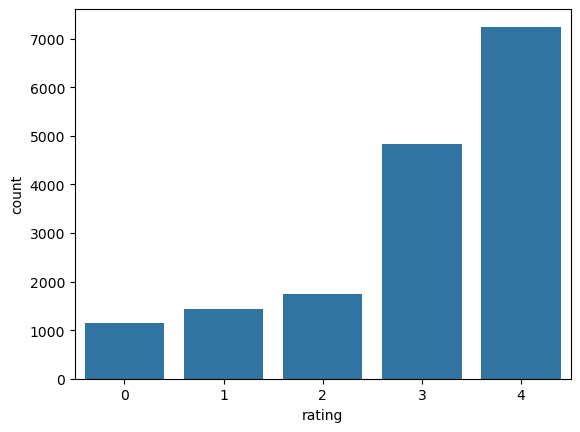

In [9]:
sns.countplot(data=train_data, x='rating')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(train_data, test_size=0.15, random_state=42)
x_train.head()

,review,rating
16096,great lobby 4 stars rooms planned stay grand h...,2
4215,good place time long time walked upscale hotel...,4
6814,mixed bag asked opinion hotel 36 hours overwhe...,1
12570,"horrible hotel, hotel 180 degrees opposite dir...",0
3601,better places stay phoenix stayed summer 2003 ...,1


In [11]:
import nlpaug.augmenter.word as naw

syn_aug = naw.SynonymAug()
spell_aug = naw.SpellingAug()
ant_aug = naw.AntonymAug()
rand_aug = naw.RandomWordAug()
for i in range(4):
    to_augment = x_train.loc[x_train['rating'] == i, 'review']
    to_augment = to_augment.to_list()
    augmented_data = syn_aug.augment(to_augment)
    # if i in (0, 1):
    #     rand_augmented = rand_aug.augment(to_augment)
    #     augmented_data += rand_augmented
    # if i != 3: 
    #     con_augmented = spell_aug.augment(to_augment)
    #     ant_augmented = ant_aug.augment(to_augment)
    #     augmented_data += con_augmented
    #     augmented_data += ant_augmented
    if i == 3:
        val_counts = x_train['rating'].value_counts()
        len_to_aug = val_counts[4] - val_counts[3]
        augmented_data = augmented_data[:len_to_aug]
    augmented_data = {
        'review': augmented_data,
        'rating': [i] * len(augmented_data),
    }
    x_train = pd.concat([x_train, pd.DataFrame(augmented_data)], ignore_index=True)

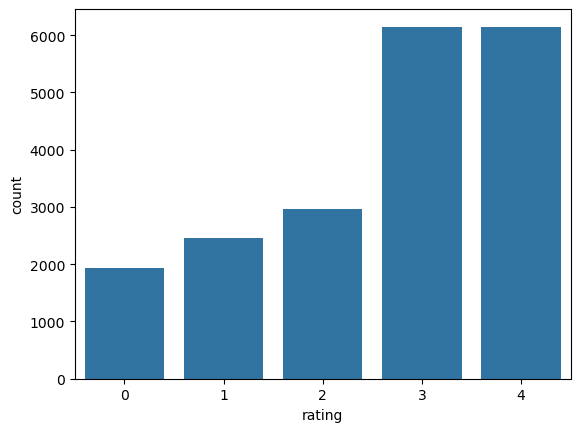

In [12]:
sns.countplot(data=x_train, x='rating')
plt.show()

In [12]:
test_data = pd.read_csv("data/test_data.csv")
test_data.head()

,review
0,great hotel location stayed 4 nts 24th 28th ja...
1,"n't return overall disappointed hotel, no hot ..."
2,great value location desired problem hotel loc...
3,kind helpfull people people kind helpful.we no...
4,absolutely fabulous melia comfortable star hot...
